In [ ]:
import pandas as pd   
import numpy as np   
import matplotlib.pyplot as plt   
import seaborn as sns    


In [3]:
data = pd.read_csv('fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.shape 

(6362620, 11)

* <font color='DarkOrange'>step</font> : represents a unit of time where 1 step equals 1 hour
* <font color='Pink'>type</font> : type of online transaction
* <font color='Orange'>amount</font> : the amount of the transaction
* <font color='Yellow'>nameOrig</font> : customer starting the transaction
* <font color='Purple'>oldbalanceOrg</font> : balance before the transaction
* <font color='Green'>newbalanceOrig</font> : balance after the transaction
* <font color='Brown'>nameDest</font> : recipient of the transaction
* <font color='Tomato'>oldbalanceDest</font> : initial balance of recipient before the transaction
* <font color='DarkKhaki'>newbalanceDest</font> : the new balance of recipient after the transaction
* <font color='red'>isFraud</font> : fraud transaction

In [5]:
print(data.isnull().sum()) 

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [6]:
# Exploring transaction type
print(data.type.value_counts()) # 0 - Cash in, 1 - Cash out, 2 - Debit, 3 - Payment, 4 - Transfer

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [7]:
type = data["type"].value_counts()
print(type)

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [8]:
import plotly.express as px
type_counts = data["type"].value_counts().reset_index()
type_counts.columns = ['Transaction Type', 'Count']

figure = px.pie(type_counts,
                values='Count',
                names='Transaction Type',
                hole=0.5,
                title="Distribution of Transaction Type")

figure.show()

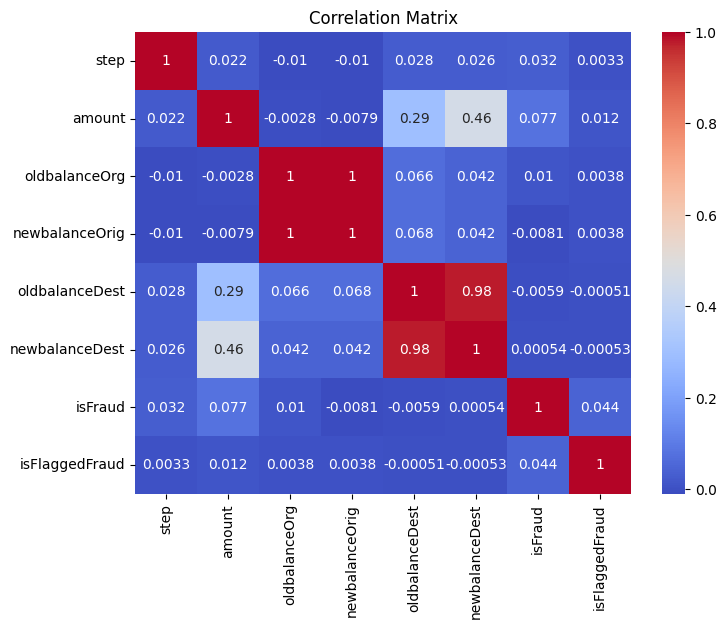

In [9]:


# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Correlation matrix
correlation = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
      

In [10]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(data.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [ ]:
# splitting the data
from sklearn.model_selection import train_test_split
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])
test_size=0.2
random_state=21

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pickle

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)

# ✅ Save the model
pickle.dump(model, open("static/model.pkl", "wb"))

print("Model trained and saved.")

Model trained and saved.


In [13]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict([[0,181, 181, 0]])
print(y_pred)

['Fraud']
